In [21]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [22]:
#  Load Dataset
df = pd.read_csv("new_cleaned_loan_data.csv")
df = df.drop(columns=["Unnamed: 0", "loan_id"], errors='ignore')

In [23]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [24]:
#  Clean Categorical Features
df['education'] = df['education'].fillna('Unknown').astype(str).str.strip()
df['self_employed'] = df['self_employed'].fillna('Unknown').astype(str).str.strip()

In [25]:
#  Feature & Target Separation
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [26]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [27]:
y

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: object

In [28]:
#  Define Columns
categorical_cols = ['education', 'self_employed']
numerical_cols = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

In [29]:
#  Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [30]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#  Models
log_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

forest_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=150, random_state=42))
])

In [32]:
# Train Models
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'commercial_assets_value',
                                                   'luxury_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=150, random_state=42))])

In [33]:
# Predictions &  check Accuracy
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)

print("\n Model Accuracies:")
print(f"Logistic Regression Accuracy:" ,log_acc)
print(f"Decision Tree Accuracy:" ,tree_acc)
print(f"Random Forest Accuracy: ",forest_acc)



 Model Accuracies:
Logistic Regression Accuracy: 0.905152224824356
Decision Tree Accuracy: 0.9754098360655737
Random Forest Accuracy:  0.9812646370023419


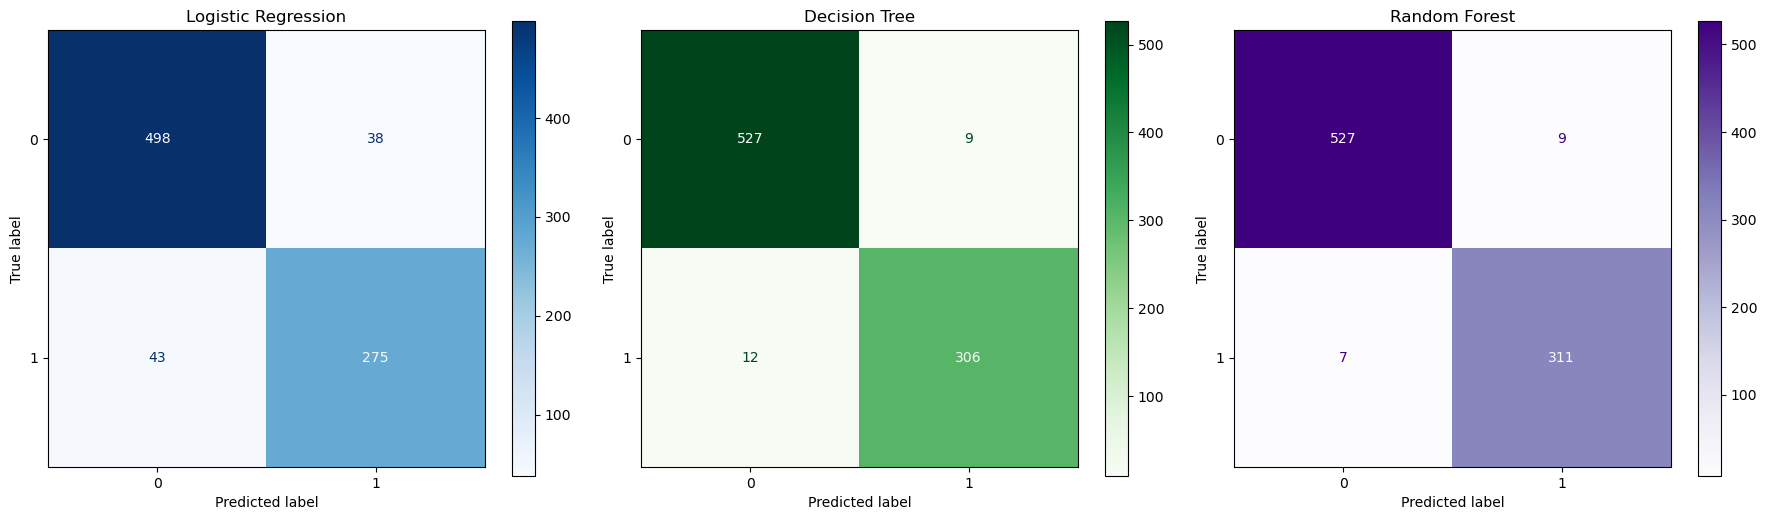

In [34]:
# 10. Confusion Matrices
cm_log = confusion_matrix(y_test, log_preds)
cm_tree = confusion_matrix(y_test, tree_preds)
cm_forest = confusion_matrix(y_test, forest_preds)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay(cm_log, display_labels=[0, 1]).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(cm_tree, display_labels=[0, 1]).plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Decision Tree")

ConfusionMatrixDisplay(cm_forest, display_labels=[0, 1]).plot(ax=axes[2], cmap='Purples')
axes[2].set_title("Random Forest")
plt.tight_layout()
plt.show()

In [35]:

# 11. Save Best Model
with open("LoanApproval.pkl", "wb") as f:
    pickle.dump(forest_model, f)

print("\n✅ Best model (Random Forest) saved as 'LoanApproval.pkl'")


✅ Best model (Random Forest) saved as 'LoanApproval.pkl'
